In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

228813984/228813984 [==============================] - 2s 0us/step


In [3]:
data_dir

'./datasets/flower_photos'

In [4]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [5]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/sunflowers/19453165201_2aa747e0bf.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/8249000137_eddfffa380_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/27465811_9477c9d044.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/15054751430_5af76f6096_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/15472217046_2699b25584.jpg')]

In [6]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [7]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/4558025386_2c47314528.jpg'),
 PosixPath('datasets/flower_photos/roses/15537825851_a80b6321d7_n.jpg'),
 PosixPath('datasets/flower_photos/roses/4918137796_21f0922b0c_n.jpg'),
 PosixPath('datasets/flower_photos/roses/5073473370_bdbb5a99fc.jpg'),
 PosixPath('datasets/flower_photos/roses/4495885281_fe2a3b671d.jpg')]

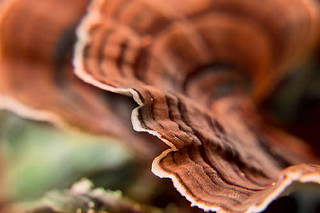

In [8]:
PIL.Image.open(str(roses[1]))

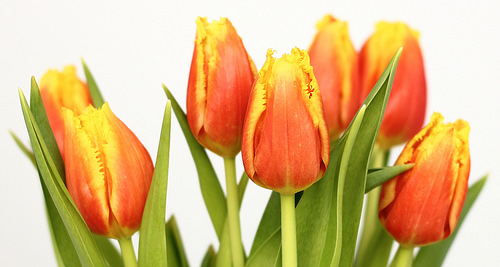

In [9]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

In [10]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [11]:
flowers_images_dict['roses']

[PosixPath('datasets/flower_photos/roses/4558025386_2c47314528.jpg'),
 PosixPath('datasets/flower_photos/roses/15537825851_a80b6321d7_n.jpg'),
 PosixPath('datasets/flower_photos/roses/4918137796_21f0922b0c_n.jpg'),
 PosixPath('datasets/flower_photos/roses/5073473370_bdbb5a99fc.jpg'),
 PosixPath('datasets/flower_photos/roses/4495885281_fe2a3b671d.jpg'),
 PosixPath('datasets/flower_photos/roses/16525204061_9b47be3726_m.jpg'),
 PosixPath('datasets/flower_photos/roses/174109630_3c544b8a2f.jpg'),
 PosixPath('datasets/flower_photos/roses/563847503_89e9756c80.jpg'),
 PosixPath('datasets/flower_photos/roses/8983268106_dc913d17d8_m.jpg'),
 PosixPath('datasets/flower_photos/roses/9406573080_60eab9278e_n.jpg'),
 PosixPath('datasets/flower_photos/roses/4609168052_3d4e1d3804_n.jpg'),
 PosixPath('datasets/flower_photos/roses/5492988531_574cdc2bf0_n.jpg'),
 PosixPath('datasets/flower_photos/roses/3742155164_14b557a51c_n.jpg'),
 PosixPath('datasets/flower_photos/roses/15061894841_e5aca59ecd_n.jpg'),
 

In [12]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [13]:
flowers_images_dict['roses'][:5]

[PosixPath('datasets/flower_photos/roses/4558025386_2c47314528.jpg'),
 PosixPath('datasets/flower_photos/roses/15537825851_a80b6321d7_n.jpg'),
 PosixPath('datasets/flower_photos/roses/4918137796_21f0922b0c_n.jpg'),
 PosixPath('datasets/flower_photos/roses/5073473370_bdbb5a99fc.jpg'),
 PosixPath('datasets/flower_photos/roses/4495885281_fe2a3b671d.jpg')]

In [14]:
str(flowers_images_dict['roses'][0])

'datasets/flower_photos/roses/4558025386_2c47314528.jpg'

In [15]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [16]:
img.shape

(334, 500, 3)

In [17]:
cv2.resize(img, (180, 180)).shape

(180, 180, 3)

In [18]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
  for image in images:
    img = cv2.imread(str(image))
    resized_img = cv2.resize(img, (180, 180))
    X.append(resized_img)
    y.append(flowers_labels_dict[flower_name])

In [19]:
X = np.array(X)
y = np.array(y)

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [21]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [26]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [27]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [29]:
model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
86/86 [==============================] - 7s 20ms/step - loss: 1.3797 - accuracy: 0.4033
Epoch 2/30
86/86 [==============================] - 2s 19ms/step - loss: 1.0360 - accuracy: 0.5752
Epoch 3/30
86/86 [==============================] - 2s 20ms/step - loss: 0.8511 - accuracy: 0.6711
Epoch 4/30
86/86 [==============================] - 2s 22ms/step - loss: 0.6400 - accuracy: 0.7656
Epoch 5/30
86/86 [==============================] - 2s 20ms/step - loss: 0.4295 - accuracy: 0.8557
Epoch 6/30
86/86 [==============================] - 2s 22ms/step - loss: 0.2684 - accuracy: 0.9088
Epoch 7/30
86/86 [==============================] - 2s 22ms/step - loss: 0.1676 - accuracy: 0.9488
Epoch 8/30
86/86 [==============================] - 2s 20ms/step - loss: 0.1104 - accuracy: 0.9680
Epoch 9/30
86/86 [==============================] - 2s 20ms/step - loss: 0.0627 - accuracy: 0.9826
Epoch 10/30
86/86 [==============================] - 2s 20ms/step - loss: 0.0303 - accuracy: 0.9942
Epoch 11/

In [36]:
X_test_scaled.shape

(918, 180, 180, 3)

Here we see that while train accuracy is very high (99%), the test accuracy is significantly low (66.99%) indicating overfitting. Let's make some predictions before we use data augmentation to address overfitting



In [30]:
predictions = model.predict(X_test_scaled)
predictions

29/29 [==============================] - 1s 24ms/step


array([[ -4.034957  ,  16.496368  ,   8.693183  ,   1.9492748 ,
        -12.07562   ],
       [ 21.672829  ,  -1.4145945 , -14.797303  ,  -0.88326514,
         10.472994  ],
       [ -7.034641  ,  -0.7202546 ,   8.006469  ,  12.364933  ,
         -2.1284935 ],
       ...,
       [ -5.3904524 ,  -5.5623703 ,  11.407173  ,  12.823345  ,
          3.376211  ],
       [ 15.081804  ,   6.335471  ,  -0.07701801,  -4.1567273 ,
          6.946684  ],
       [ 13.149454  ,  -4.501322  ,  -5.6328964 ,   5.8410463 ,
          4.764223  ]], dtype=float32)

In [31]:
score = tf.nn.softmax(predictions[0])

In [32]:
np.argmax(score)

1

In [33]:
y_test[0]

1

Improve Test Accuracy Using Data Augmentation


In [37]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal",
                                                 input_shape=(180,
                                                              180,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

Original Image



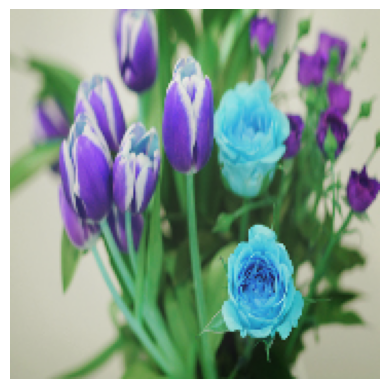

In [38]:
plt.axis('off')
plt.imshow(X[0])

Newly generated training sample using data augmentation



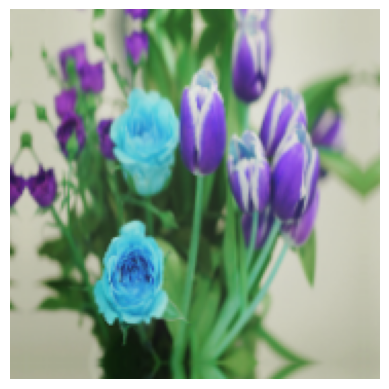

In [39]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

Train the model using data augmentation and a drop out layer


In [40]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
86/86 [==============================] - 6s 29ms/step - loss: 1.4381 - accuracy: 0.3666
Epoch 2/30
86/86 [==============================] - 3s 34ms/step - loss: 1.1234 - accuracy: 0.5621
Epoch 3/30
86/86 [==============================] - 2s 28ms/step - loss: 1.0077 - accuracy: 0.6072
Epoch 4/30
86/86 [==============================] - 2s 27ms/step - loss: 0.9369 - accuracy: 0.6283
Epoch 5/30
86/86 [==============================] - 2s 27ms/step - loss: 0.8977 - accuracy: 0.6577
Epoch 6/30
86/86 [==============================] - 2s 27ms/step - loss: 0.8021 - accuracy: 0.6966
Epoch 7/30
86/86 [==============================] - 2s 28ms/step - loss: 0.7456 - accuracy: 0.7097
Epoch 8/30
86/86 [==============================] - 3s 30ms/step - loss: 0.7065 - accuracy: 0.7238
Epoch 9/30
86/86 [==============================] - 2s 27ms/step - loss: 0.6831 - accuracy: 0.7416
Epoch 10/30
86/86 [==============================] - 2s 27ms/step - loss: 0.6331 - accuracy: 0.7504
Epoch 11/

In [41]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 1s 12ms/step - loss: 1.0261 - accuracy: 0.7375


[1.0261361598968506, 0.7374727725982666]